# Data Importing

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data=pd.read_csv('weight-height.csv')
data.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


# Data Visualization  

In [43]:
#Seperating Male and Female Data
data1=data[data['Gender']=='Male']
data2=data[data['Gender']=='Female']

In [44]:
#data1  # for male 
data2.head(2)   #for female

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823


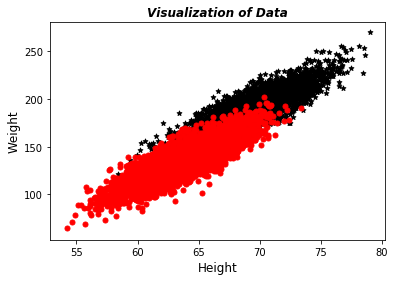

In [5]:
data1=data[data['Gender']=='Male']
data2=data[data['Gender']=='Female']
plt.scatter(data1['Height'],data1['Weight'],color='K',s=25,marker='*') #All the data with Y=1,represented by Black,Admitted
plt.scatter(data2['Height'],data2['Weight'],color='R',s=25,marker='o') # All data with Y=0 ,represented by Red,Rejected
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Height',fontsize=12)
plt.ylabel('Weight',fontsize=12)
plt.show()

# Data Processing

In [6]:
X=data.iloc[:,[1,2]].values
y=data.iloc[:,0].values


In [7]:
from sklearn.preprocessing import LabelEncoder  # Encoding library call
enc = LabelEncoder()
label_encoder = enc.fit(y)
label_encoder
Y = label_encoder.transform(y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
## Spliting your data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Model Building

In [9]:
from sklearn.linear_model import LogisticRegression as lr
clf = lr(random_state=42, solver='lbfgs',multi_class='multinomial',class_weight='balanced')  #solver=lbfgh is gradient decent
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

Measuring Accuracy with .score

In [10]:
clf.score(X_train, Y_train)

0.918

In [11]:
clf.score(X_test, Y_test)

0.9223333333333333

# Measuring Accuracy with k fold

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, Y_train, cv=4, scoring="accuracy") 

array([0.91205026, 0.928     , 0.91085714, 0.91881075])

# Meauring acuuracy with F1Score

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred_train = cross_val_predict(clf, X_train, Y_train, cv=4)
from sklearn.model_selection import cross_val_predict
y_train_pred_test = cross_val_predict(clf, X_test, Y_test, cv=4)

In [14]:
from sklearn.metrics import f1_score
f1_score(Y_train , y_train_pred_train,average='macro')

0.9174220932760521

In [15]:
from sklearn.metrics import f1_score
f1_score(Y_test , y_train_pred_test,average='macro')

0.921944493862302

In [ ]:
#predicted values of X_test
a=clf.predict(X_test)
a

In [17]:
input1.shape

(3000, 2)

In [34]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [40]:
clf.coef_ 

array([[-0.25540409,  0.09916557]])

In [24]:
clf.coef_[0,0]

-0.2554040892658331

In [25]:
clf.intercept_

array([0.96540423])

In [26]:
clf.intercept_[0]

0.9654042341962634

For putting the predicted values and height and weight of test data in a single Data Frame

In [38]:
#putting the test data in a Data Frame
#input1=pd.DataFrame(X_test)

In [39]:
#output2=rnd_clf.predict(X_Test)  

In [19]:
#output=pd.DataFrame(a)
#output

In [20]:
#input1.reset_index(drop=True, inplace=True)
#output.reset_index(drop=True, inplace=True)


In [21]:
#Final_on_test=pd.concat([input1,output],axis=1,ignore_index=True)

In [22]:
#Final_on_test.rename(columns={0: 'Height',1 : 'Weight',2: 'Gender'},inplace=True)
#Final_on_test.head(10)